In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [23]:
#Read the data
data=pd.read_csv("ToyotoCorrola.csv")

In [24]:
data.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [26]:
data.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [27]:
data.drop(["Id","Cylinders"],inplace=True,axis=1)

In [28]:
data.corr()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


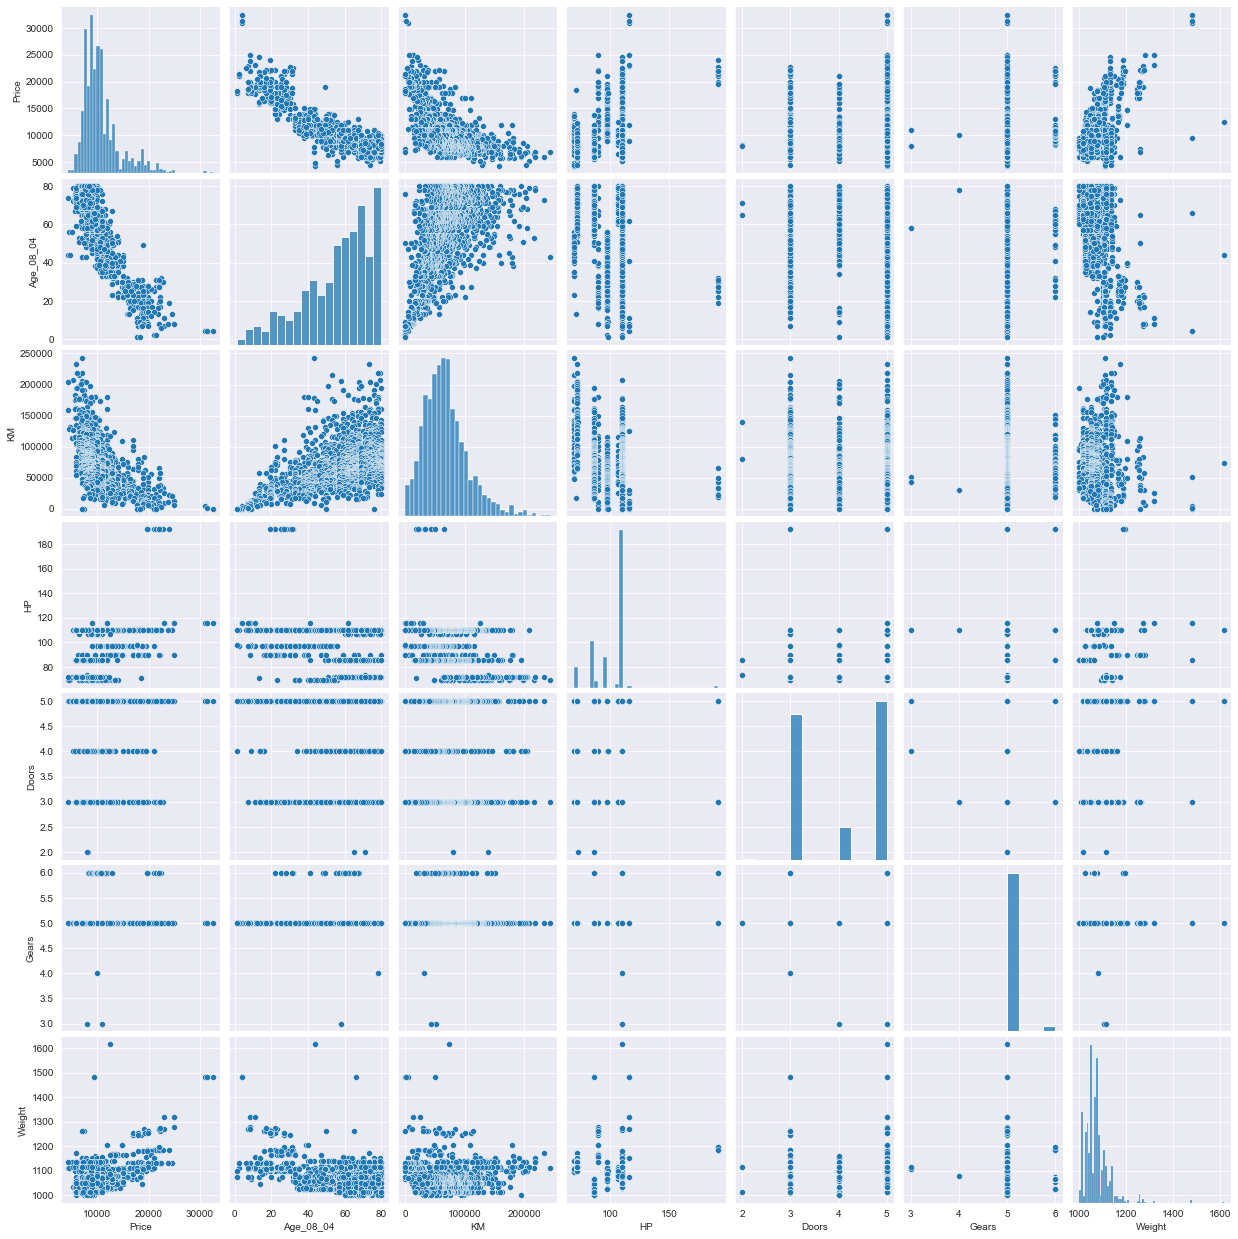

In [29]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [31]:
import statsmodels.formula.api as smf
model=smf.ols("np.log(Price) ~ np.log(Age_08_04)+np.log(KM)+np.log(HP)+np.log(Gears)+np.log(Weight)",data=data).fit()

In [32]:
model.params

Intercept            3.369837
np.log(Age_08_04)   -0.456375
np.log(KM)           0.017531
np.log(HP)           0.387509
np.log(Gears)        0.287625
np.log(Weight)       0.747772
dtype: float64

In [33]:
print(model.tvalues,'/n',model.pvalues)

Intercept             4.535211
np.log(Age_08_04)   -39.491682
np.log(KM)            3.590523
np.log(HP)           14.172390
np.log(Gears)         2.676288
np.log(Weight)        7.413242
dtype: float64 /n Intercept             6.235587e-06
np.log(Age_08_04)    2.936696e-231
np.log(KM)            3.411776e-04
np.log(HP)            9.221609e-43
np.log(Gears)         7.529314e-03
np.log(Weight)        2.101373e-13
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)

(0.7485310755572655, 0.7476518135836895)

In [13]:
ml_v=smf.ols('Price~Weight',data=data).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


In [14]:
ml_v=smf.ols('Price~KM',data=data).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [15]:
ml_v=smf.ols('Price~KM+Weight',data=data).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues) 

Intercept   -23.321256
KM          -35.132111
Weight       35.865992
dtype: float64 
 Intercept    3.044633e-102
KM           1.461103e-195
Weight       1.380010e-201
dtype: float64


In [16]:
rsq_KM=smf.ols('KM~HP+Gears+Weight',data=data).fit().rsquared
vif_KM=1/(1-rsq_KM)

In [17]:
rsq_HP=smf.ols('HP~KM+Gears+Weight',data=data).fit().rsquared
vif_HP=1/(1-rsq_HP)

In [18]:
rsq_Gears=smf.ols('Gears~HP+KM+Weight',data=data).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

In [38]:
rsq_Weight=smf.ols('Weight~HP+KM+Gears',data=data).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

In [39]:
d1={'Variables':['KM','HP','Gears','Weight'],'VIF':[vif_KM,vif_HP,vif_Gears,vif_Weight]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,KM,1.134798
1,HP,1.194714
2,Gears,1.054844
3,Weight,1.008101


# Residual Analysis

## Test for Normality of Residual (Q-Q plot)

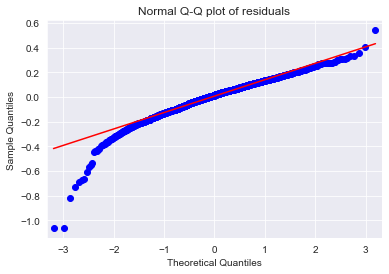

In [40]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [41]:
list(np.where(model.resid>10))

[array([], dtype=int64)]

In [42]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

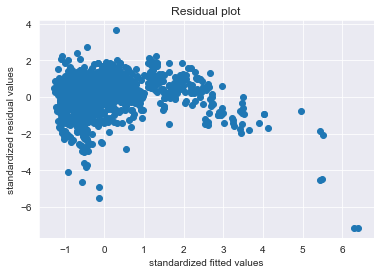

In [43]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [44]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

ValueError: 'KM' is not in list

<Figure size 1080x576 with 0 Axes>

In [34]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

ValueError: 'HP' is not in list

<Figure size 1080x576 with 0 Axes>

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

ValueError: 'Gears' is not in list

<Figure size 1080x576 with 0 Axes>

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

ValueError: 'Doors' is not in list

<Figure size 1080x576 with 0 Axes>

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

ValueError: 'Weight' is not in list

<Figure size 1080x576 with 0 Axes>

In [38]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

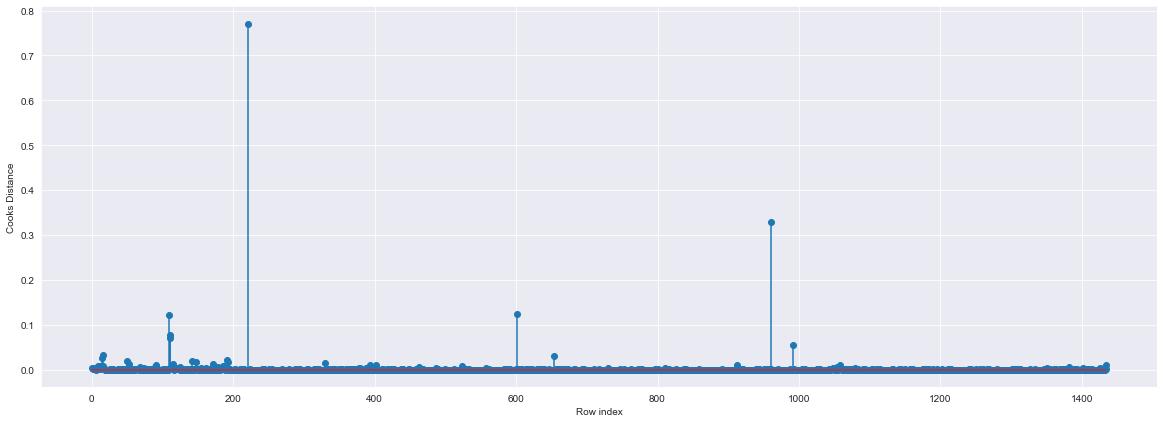

In [34]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c),np.max(c))

(221, 0.7709025434560948)

In [36]:
from statsmodels.graphics.regressionplots import influence_plot

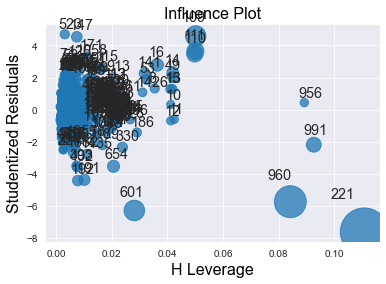

In [37]:
influence_plot(model)
plt.show()

In [38]:
K=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((K+1)/n)

In [39]:
leverage_cutoff

0.02298050139275766

In [40]:
data[data.index.isin([956,991,960,221,601])]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
601,605,TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors,7500,50,1,90,3,4,5,1260
956,960,TOYOTA Corolla 1.6 Linea Luna Aut. 4/5-Doors,10950,58,51421,110,5,4,3,1105
960,964,TOYOTA Corolla,9390,66,50806,86,3,4,5,1480
991,996,TOYOTA Corolla 1.6 Lin.Terra Aut. 4/5-Doors,7950,58,43000,110,4,4,3,1114


In [41]:
data.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [42]:
data_new=pd.read_csv("ToyotoCorrola.csv")

In [43]:
data1=data_new.drop(data_new.index[[956,991,960,221]],axis=0).reset_index()

In [44]:
data1=data1.drop(['index'],axis=1)

In [45]:
data1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1428,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1429,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1430,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [46]:
model1=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=data1).fit()

In [47]:
(model1.rsquared,model1.aic)

(0.8733322820404418, 24594.88171135487)

# Cook's Distance

In [48]:
model_influence_v=model1.get_influence()
(c_v,_)=model_influence_v.cooks_distance

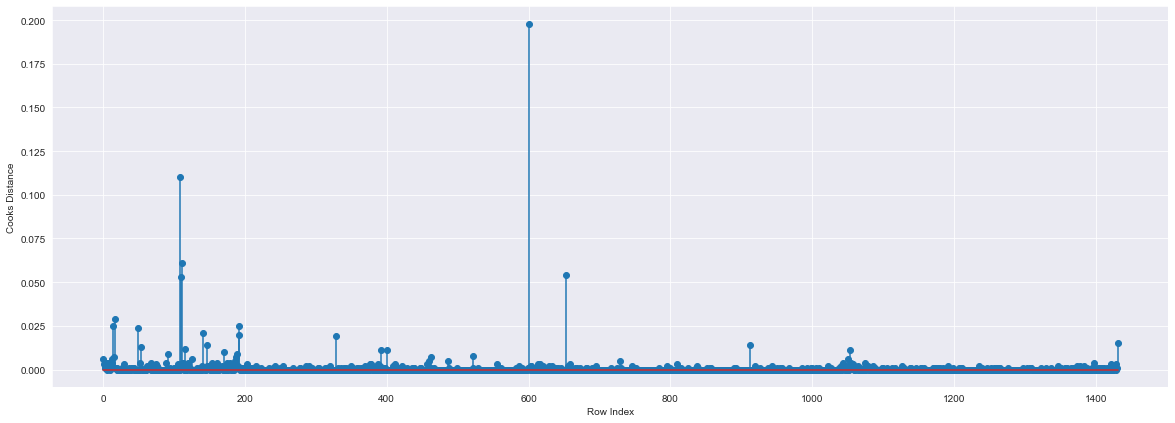

In [49]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_v,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');

In [50]:
(np.argmax(c_v),np.max(c_v))

(600, 0.19841285070980225)

In [51]:
data2=data1.drop(data1.index[[956,991,960,221]],axis=0)

In [52]:
data3=data2.reset_index()

In [53]:
data3=data2.drop(['Id','Model'],axis=1)

In [54]:
data3

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,3,4,5,1025
1428,10845,72,19000,86,3,4,5,1015
1429,8500,71,17016,86,3,4,5,1015
1430,7250,70,16916,86,3,4,5,1015


In [55]:
model2=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=data3).fit()

In [56]:
model_influence_v=model2.get_influence()
(C_v,_)=model_influence_v.cooks_distance

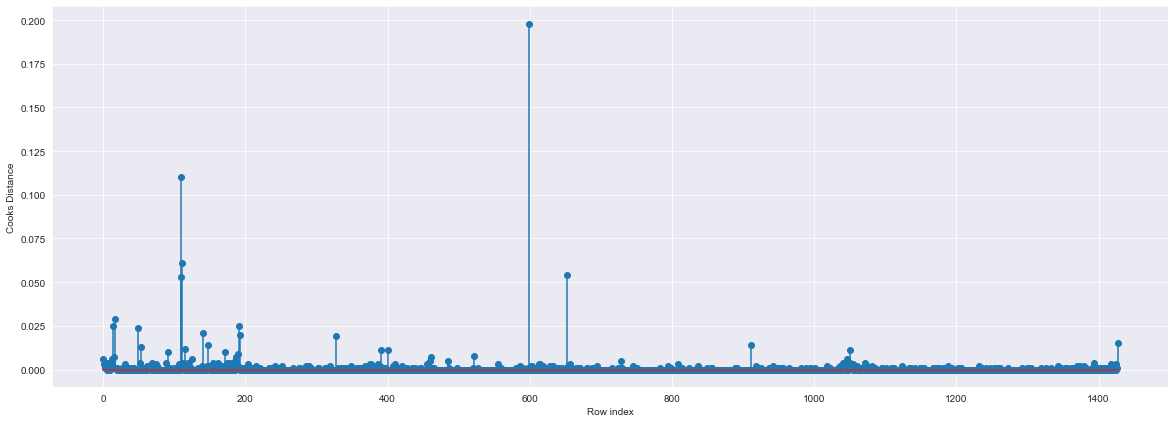

In [57]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(C_v,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [58]:
(np.argmax(C_v),np.max(C_v))

(599, 0.19813709976361166)

In [64]:
model3=smf.ols('Price~Age_08_04+HP+KM+Weight',data=data3).fit()

In [65]:
(model3.rsquared,model3.aic)

(0.8726151991100526, 24533.83006263457)

In [66]:
new_data=pd.DataFrame({"Age_08_04":24,"HP":90,"KM":72937,"Weight":1170},index=[1])

In [67]:
model3.predict(new_data)

1    16196.516653
dtype: float64

In [70]:
model3.predict(data_new.iloc[0:5,])

0    16756.291453
1    16201.485906
2    16753.029313
3    16386.504623
4    16236.526988
dtype: float64

In [71]:
pred_y=model3.predict(data_new)

In [72]:
pred_y

0       16756.291453
1       16201.485906
2       16753.029313
3       16386.504623
4       16236.526988
            ...     
1431     8758.370457
1432     8221.137156
1433     8379.589211
1434     8497.763294
1435    11056.406217
Length: 1436, dtype: float64